# Notebook for the cell-cell interaction research of fetal stem cells with myeloid cells using liana package
- **Developed by:** Anna Maguza
- **Place:** Wuerzburg Institute for System Immunology
- **Date:** 20th November 2023

### Import required modules

In [10]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import liana as li
import anndata as ad
import os

### Set up working environment

In [2]:
%matplotlib inline

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                         10.1.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.13.1
brotli                      1.1.0
certifi                     2023.11.17
cffi                        1.16.0
charset_normalizer          3.3.2
comm                        0.1.4
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.8.0
decorator                   5.1.1
defusedxml                  0.7.1
docrep                      0.3.2
exceptiongroup              1.1.3
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
get_annotations             NA
h5py                        3.10.0
idna                        3.4
importlib_resources         NA
ipykernel                   6.26.0
isodurati

In [ ]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

### Data Upload

In [ ]:
input_path = 'FetalSC_data/FetalSC_and_other_fetal_cells/FetalSC_and_myeloid_cells_raw.h5ad'
adata = sc.read_h5ad(input_path)

In [ ]:
# Extract the raw counts
adata = adata.raw.to_adata()
adata

In [ ]:
X_is_raw(adata)

In [ ]:
# Save raw counts in raw
adata.raw = adata

### Preprocess data

In [ ]:
sc.pp.normalize_total(adata, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata)

### Liana Run

In [ ]:
# import all individual methods
import liana 
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

In [ ]:
# Run rank_aggregate
li.mt.rank_aggregate(adata, groupby='Cell States', expr_prop=0, verbose=True)

In [ ]:
adata.uns['liana_res'].head()

In [ ]:
#Write anndata object to file
adata.write('FetalSC_data/FetalSC_and_other_fetal_cells/FetalSC_and_myeloid_liana_aggregated.h5ad')

In [34]:
adata = sc.read_h5ad('FetalSC_data/FetalSC_and_other_fetal_cells/FetalSC_and_myeloid_liana_aggregated.h5ad')

In [6]:
del adata

In [43]:
df = adata.uns['liana_res']

# save dataframe to csv
#df.to_csv('FetalSC_data/FetalSC_and_other_fetal_cells/FetalSC_and_myeloid_liana_aggregated.csv')

In [35]:
# Extract all values from neuronal.obs['Cell States'] into list
cell_states = []
for i in adata.obs['Cell States']:
    cell_states.append(i)


# Conver cell_states to a list
cell_states = list(cell_states)

# Delete 'MMP9+ Inflammatory macrophage' from cell_states
cell_states.remove('MMP9+ Inflammatory macrophage')
cell_states.remove('MMP9+ Inflammatory macrophage')
cell_states.remove('MMP9+ Inflammatory macrophage')
cell_states.remove('MMP9+ Inflammatory macrophage')

#### Stem cells are sources


+ FXYD3+_CKB+_SC

In [ ]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['FXYD3+_CKB+_SC'],
              target_labels=cell_states,
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


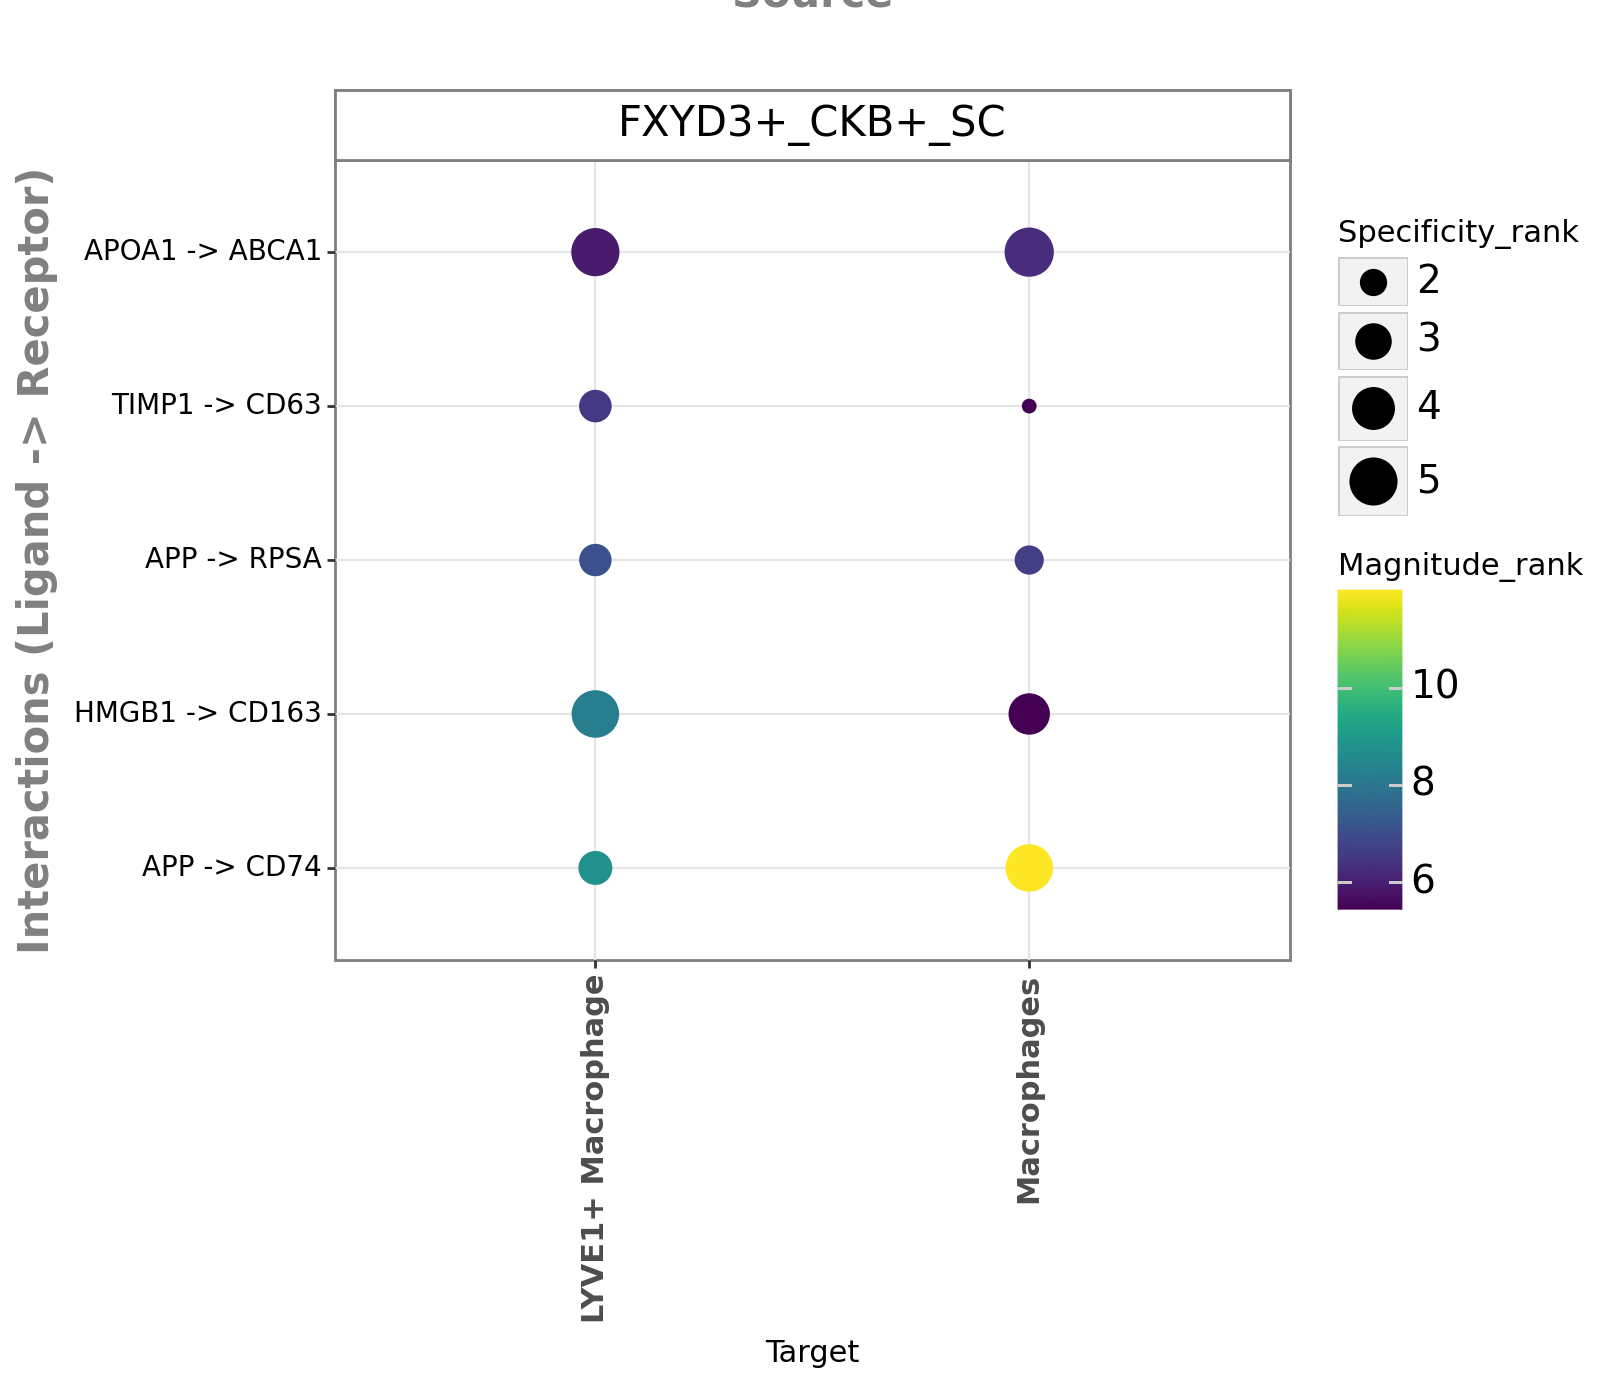

<Figure Size: (800 x 700)>

In [12]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['FXYD3+_CKB+_SC'],
              target_labels=['Macrophages', 'LYVE1+ Macrophage'],
              top_n=5,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )

+ MTRNR2L12+ASS1+_SC

In [ ]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['MTRNR2L12+ASS1+_SC'],
              target_labels=cell_states,
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )

+ RPS10+_RPS17+_SC

In [ ]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['RPS10+_RPS17+_SC'],
              target_labels=cell_states,
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )

#### Stem cells are targets


+ Stem cells and macrophages

In [ ]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['Macrophages', 'LYVE1+ Macrophage'],
              target_labels=['RPS10+_RPS17+_SC', 'MTRNR2L12+ASS1+_SC', 'FXYD3+_CKB+_SC'],
              top_n=20,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(15, 10)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


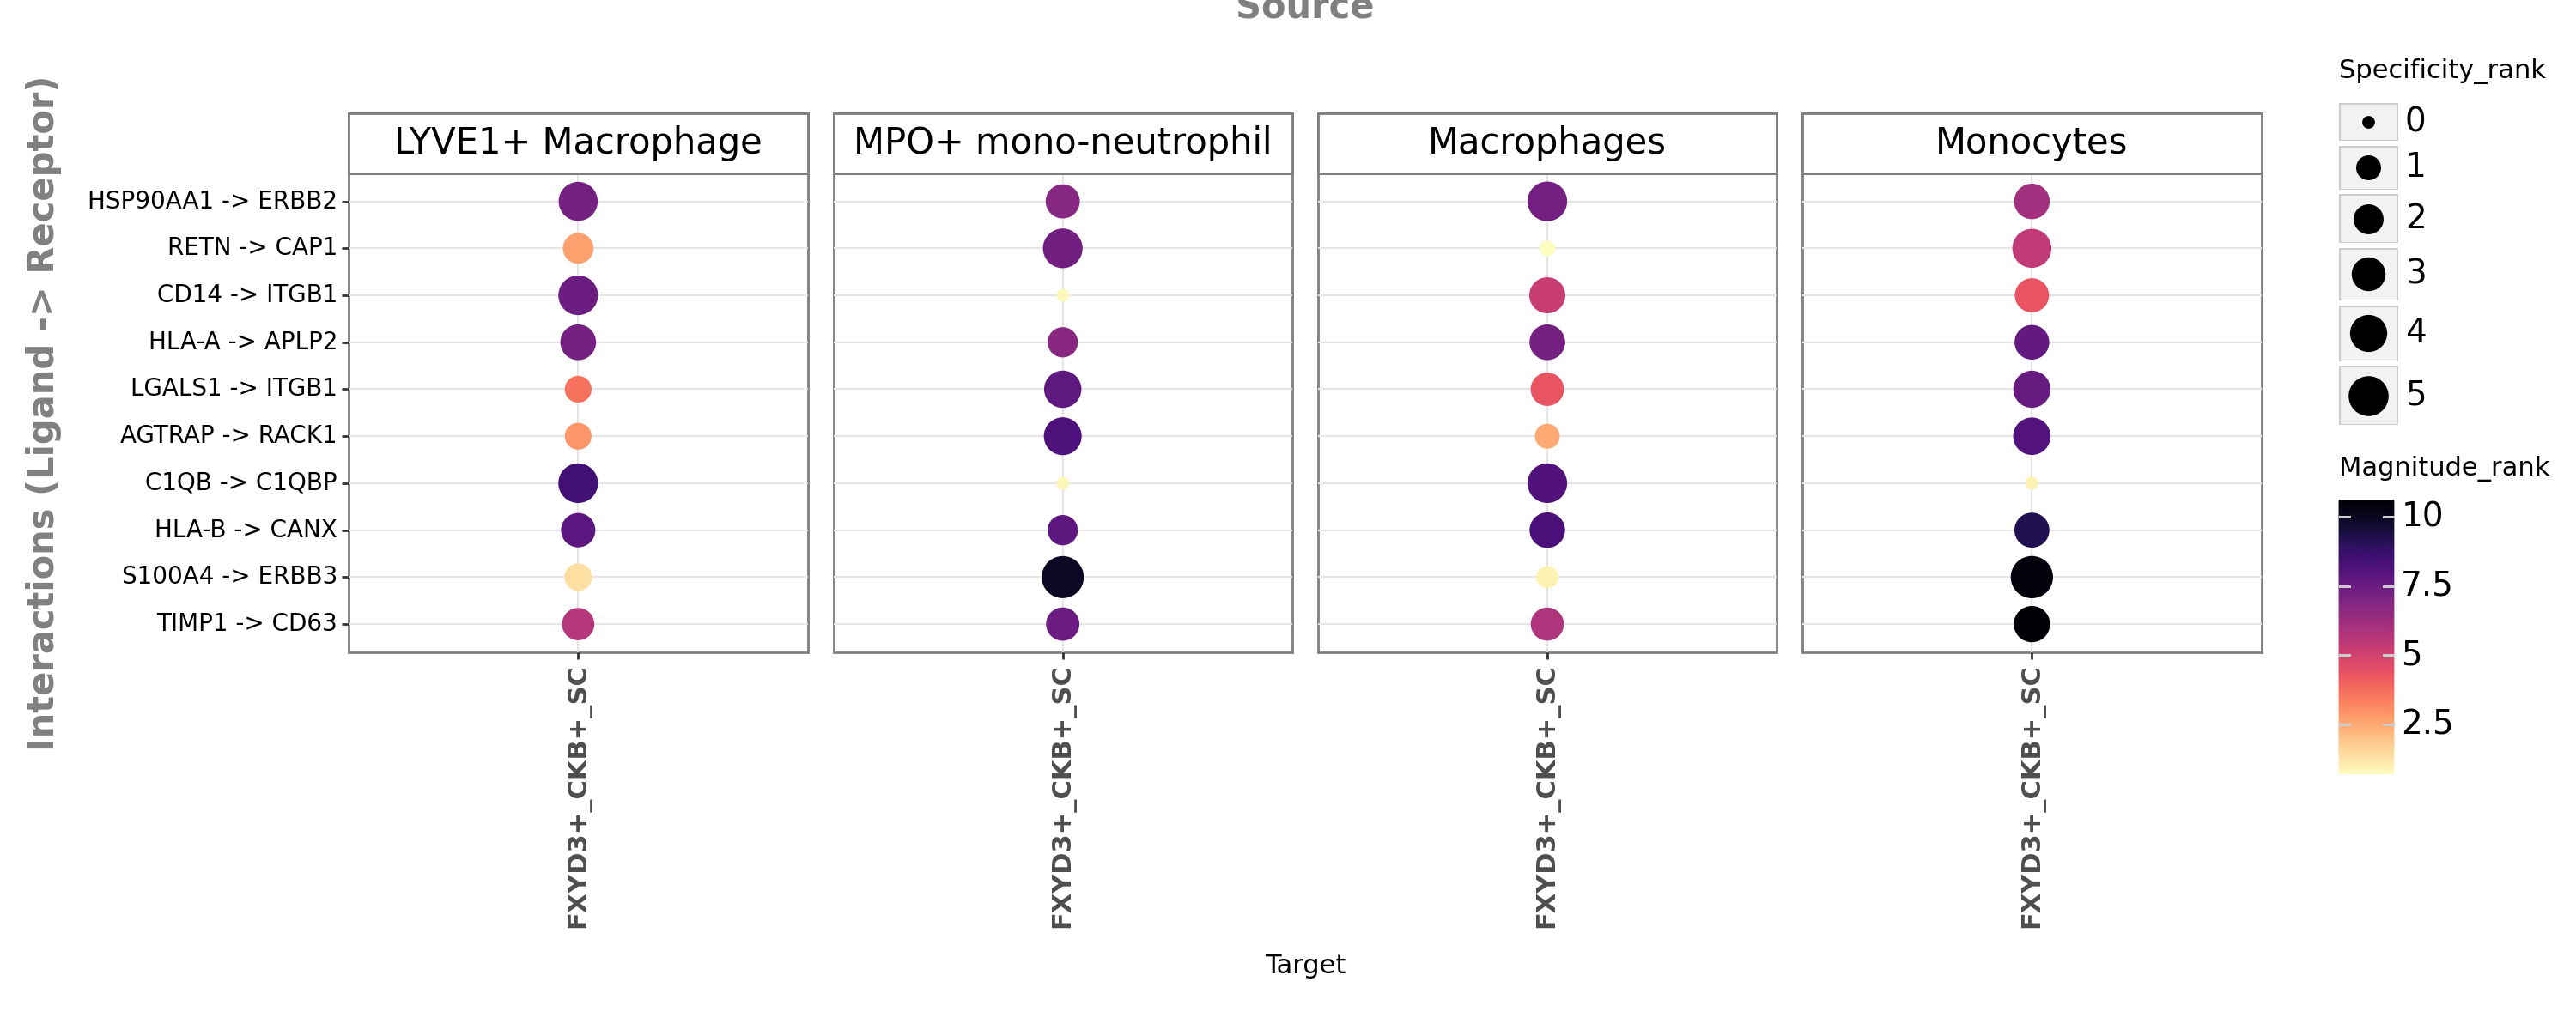

<Figure Size: (1500 x 600)>

In [8]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['Macrophages', 'LYVE1+ Macrophage', 'Monocytes', 'MPO+ mono-neutrophil'],
              target_labels=['FXYD3+_CKB+_SC'],
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(15, 6), cmap='magma_r'
             )

+ Stem cells and dendritic cells

In [ ]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['cDC1', 'cDC2', 'Lymphoid DC', 'pDC'],
              target_labels=['RPS10+_RPS17+_SC', 'MTRNR2L12+ASS1+_SC', 'FXYD3+_CKB+_SC'],
              top_n=20,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(15, 10)
             )

+ Stem cells and monocytes

In [ ]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['Monocytes', 'MPO+ mono-neutrophil'],
              target_labels=['RPS10+_RPS17+_SC', 'MTRNR2L12+ASS1+_SC', 'FXYD3+_CKB+_SC'],
              top_n=20,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(10, 10)
             )

+ Stem cells and Mast cells

In [ ]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['Mast cell', 'CLC+ Mast cell'],
              target_labels=['RPS10+_RPS17+_SC', 'MTRNR2L12+ASS1+_SC', 'FXYD3+_CKB+_SC'],
              top_n=20,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(10, 10)
             )

+ Stem cells and Megakaryocytes

In [ ]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['Megakaryocyte'],
              target_labels=['RPS10+_RPS17+_SC', 'MTRNR2L12+ASS1+_SC', 'FXYD3+_CKB+_SC'],
              top_n=20,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(5, 10)
             )

### Visualize in chord diagram

In [ ]:
output_dir = '/mnt/LaCIE/annaM/gut_project/Processed_data/Gut_data/Plots/liana_chord_diagrams'
os.makedirs(output_dir, exist_ok=True)

In [48]:
adata.uns['liana_res']

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
133391,MPO+ mono-neutrophil,LYVE1+ Macrophage,S100A9,CD68,6.788808,0.0,44.763515,2.003654,2.777584,0.053495,0.935908,0.388684,0.0,1.105049e-05,1.941398e-14
131545,MPO+ mono-neutrophil,LYVE1+ Macrophage,S100A9,CD36,6.675943,0.0,42.971306,2.332852,3.647892,0.100416,0.934671,0.382210,0.0,2.375431e-07,4.601821e-14
528683,MPO+ mono-neutrophil,Monocytes,S100A9,ITGB2,6.780029,0.0,44.624115,2.292532,2.975672,0.070400,0.935814,0.376663,0.0,2.290990e-06,8.469706e-14
360583,MPO+ mono-neutrophil,Macrophages,S100A9,CD68,6.625484,0.0,42.170059,1.951236,2.868165,0.050395,0.934094,0.384293,0.0,1.298867e-05,1.196289e-13
133390,MPO+ mono-neutrophil,LYVE1+ Macrophage,S100A8,CD68,6.546385,0.0,42.029964,2.765537,3.131207,0.068463,0.933992,0.381549,0.0,2.696552e-06,1.553106e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795106,pDC,pDC,S100A10,TRPV6,0.000000,1.0,0.000000,-0.498040,-2.521887,0.000000,0.000000,0.000000,1.0,1.000000e+00,1.000000e+00
795093,pDC,pDC,CALML3,KCNQ1,0.000000,1.0,0.000000,-0.116119,-1.402833,0.000000,0.000000,0.000000,1.0,1.000000e+00,1.000000e+00
795094,pDC,pDC,CALM1,MIP,0.000000,1.0,0.000000,-0.235591,-0.286390,0.000000,0.000000,0.000000,1.0,1.000000e+00,1.000000e+00
795095,pDC,pDC,CALM1,TRPC5,0.000000,1.0,0.000000,-0.225055,-0.243831,0.000000,0.000000,0.000000,1.0,1.000000e+00,1.000000e+00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
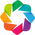

In [7]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [8]:
df['Communication'] = df['ligand_complex'] + '-' + df['receptor_complex']

In [45]:
# check if 'TIMP1-CD63' is in the dataframe
'CD14' in df['ligand_complex']

False

In [39]:
df.head()

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank,Communication
133391,MPO+ mono-neutrophil,LYVE1+ Macrophage,S100A9,CD68,6.788808,0.0,44.763515,2.003654,2.777584,0.053495,0.935908,0.388684,0.0,1.105049e-05,1.941398e-14,S100A9-CD68
131545,MPO+ mono-neutrophil,LYVE1+ Macrophage,S100A9,CD36,6.675943,0.0,42.971306,2.332852,3.647892,0.100416,0.934671,0.382210,0.0,2.375431e-07,4.601821e-14,S100A9-CD36
528683,MPO+ mono-neutrophil,Monocytes,S100A9,ITGB2,6.780029,0.0,44.624115,2.292532,2.975672,0.070400,0.935814,0.376663,0.0,2.290990e-06,8.469706e-14,S100A9-ITGB2
360583,MPO+ mono-neutrophil,Macrophages,S100A9,CD68,6.625484,0.0,42.170059,1.951236,2.868165,0.050395,0.934094,0.384293,0.0,1.298867e-05,1.196289e-13,S100A9-CD68
133390,MPO+ mono-neutrophil,LYVE1+ Macrophage,S100A8,CD68,6.546385,0.0,42.029964,2.765537,3.131207,0.068463,0.933992,0.381549,0.0,2.696552e-06,1.553106e-13,S100A8-CD68


In [27]:
# Step 1: Sort the dataframe by specificity_rank
df_sorted = df.sort_values(by='specificity_rank')

# Step 2: Select top 50 communications where 'FXYD3+_CKB+_SC' is either the source or the target
cell_type = 'FXYD3+_CKB+_SC'
top_communications = df_sorted[(df_sorted['source'] == cell_type) | (df_sorted['target'] == cell_type)].head(50)['Communication'].unique()

# Step 3: Filter the original dataframe by these top communications
df_filtered = df[df['Communication'].isin(top_communications)]

In [28]:
list_with_communications = list(df_filtered['Communication'].unique())

In [29]:
df2 = list_with_communications

In [32]:
# filter communication 'С10B-CIOBP' 
pathway = df[df['Communication'] == 'APP-CD74']

In [33]:
pathway.head(20)

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank,Communication
346283,FXYD3+_CKB+_SC,Macrophages,APP,CD74,6.978638,0.0,40.046803,0.969714,1.839922,0.023245,0.932486,0.360309,0.0,0.000013,1.440067e-12,APP-CD74
175889,FXYD3+_CKB+_SC,Lymphoid DC,APP,CD74,6.916019,0.0,39.541248,0.954828,1.160319,0.022951,0.932085,0.358489,0.0,0.000013,1.975394e-12,APP-CD74
630273,FXYD3+_CKB+_SC,cDC1,APP,CD74,6.918135,0.0,39.558331,0.955331,1.197614,0.022961,0.932099,0.356389,0.0,0.000013,3.004310e-12,APP-CD74
687071,FXYD3+_CKB+_SC,cDC2,APP,CD74,6.804832,0.0,38.643570,0.928401,1.141528,0.022430,0.931355,0.352699,0.0,0.000013,3.858155e-12,APP-CD74
743869,FXYD3+_CKB+_SC,pDC,APP,CD74,6.495850,0.0,36.148991,0.854960,0.407974,0.020982,0.929191,0.334038,0.0,0.000252,8.873500e-12,APP-CD74
516677,FXYD3+_CKB+_SC,Monocytes,APP,CD74,5.972063,0.0,31.920181,0.730464,0.057945,0.018528,0.924987,0.316214,0.0,0.001312,3.275285e-11,APP-CD74
362511,MTRNR2L12+ASS1+_SC,Macrophages,APP,CD74,6.390488,0.0,28.377310,0.743497,1.656017,0.016471,0.920802,0.285109,0.0,0.000043,5.808005e-10,APP-CD74
192117,MTRNR2L12+ASS1+_SC,Lymphoid DC,APP,CD74,6.327869,0.0,28.019072,0.728611,0.976414,0.016263,0.920337,0.283501,0.0,0.000045,7.526036e-10,APP-CD74
646501,MTRNR2L12+ASS1+_SC,cDC1,APP,CD74,6.329985,0.0,28.031176,0.729115,1.013709,0.016270,0.920353,0.281648,0.0,0.000045,8.841585e-10,APP-CD74
382796,RPS10+_RPS17+_SC,Macrophages,APP,CD74,6.439342,0.0,29.346638,0.762287,1.998141,0.017034,0.922018,0.281565,0.0,0.000037,9.016068e-10,APP-CD74


In [31]:
for communication in top_communications:
    comm_df = df_filtered[df_filtered['Communication'] == communication]
    links = comm_df[['source', 'target', 'lrscore']]
    links['lrscore'] = pd.to_numeric(links['lrscore'], errors='coerce').fillna(0)

    chord = hv.Chord(links)
    chord.opts(
        opts.Chord(
            labels='index',
            node_color='index',
            edge_color='source',
            cmap='Category20',
            edge_cmap='Category20',
            edge_alpha=0.8,
            width=1000,
            height=1000,
            title=f'Chord Diagram for {communication}'
        )
    )
    
    # Save the plot as a PNG file
    output_path = f'{output_dir}/{communication.replace("/", "_")}.png'
    hv.save(chord, output_path, fmt='png', dpi=300)

/tmp/ipykernel_28450/3248469899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/holoviews/element/graphs.py:652: RuntimeWarning: divide by zero encountered in divide
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/holoviews/element/graphs.py:652: RuntimeWarning: invalid value encountered in multiply


ValueError: cannot convert float NaN to integer